# Instacart Customer Behavior Analysis – Data Overview & EDA

##  Project Scope

This project explores user purchasing behavior using the publicly available Instacart Online Grocery Shopping Dataset. As a data analyst, the primary objective is to extract actionable insights on customer habits, product trends, and time-based ordering patterns to inform strategic decisions such as marketing campaigns, product bundling, and customer segmentation.

The dataset represents over 3 million grocery orders from approximately 200,000 users and includes detailed information on products, order history, departments, and reorder behaviors.

##  Analytical Objectives

- Understand how frequently users place orders and how long they wait between purchases
- Identify top-selling and most frequently reordered products
- Analyze user activity patterns by hour and day of week
- Explore average basket sizes and purchase diversity
- Establish a baseline for deeper SQL-driven analysis (segmentation, retention, bundling)

This notebook sets the foundation for all subsequent analysis by cleaning, visualizing, and summarizing the core behavioral dimensions of the dataset.

##  Dataset Source

[Kaggle: Instacart Market Basket Analysis](https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis)


In [8]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load data
orders = pd.read_csv('../data/raw/orders.csv')
order_products_prior = pd.read_csv('../data/raw/order_products__prior.csv')  # adjust path if needed
products = pd.read_csv('../data/raw/products.csv')  # make sure this is also loaded


# Set plot styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


## 1. User Ordering Frequency and Recency
In this section, we'll explore how frequently users place orders, how many orders they typically make, and how much time passes between their orders. This helps us understand the repeat purchase cycle and engagement patterns on the platform. Note: The sharp spike at 30 days represents a placeholder value used for users without a known prior order (e.g., first-time buyers or missing data). Excluding these entries reveals a more accurate view of actual reorder timing.


Average orders per user: 16.59


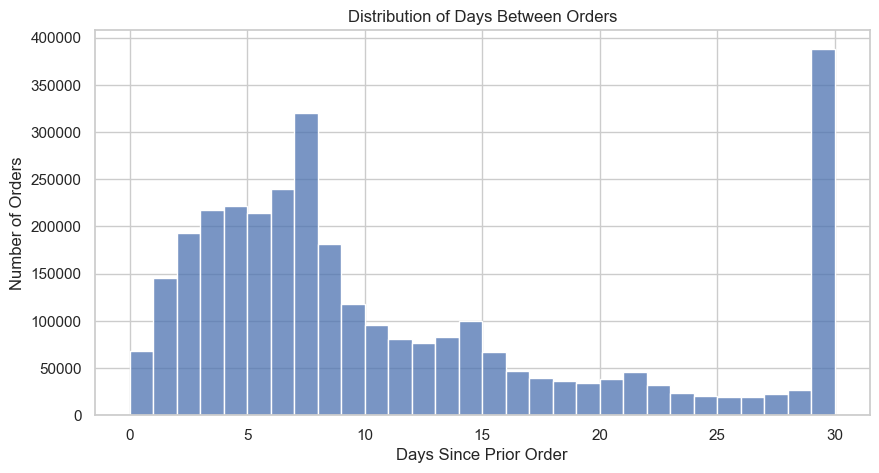

In [9]:
# Total orders per user
user_order_counts = orders.groupby('user_id')['order_number'].max()
print("Average orders per user:", round(user_order_counts.mean(), 2))

# Days between orders
plt.figure(figsize=(10,5))
sns.histplot(orders['days_since_prior_order'].dropna(), bins=30, kde=False)
plt.title("Distribution of Days Between Orders")
plt.xlabel("Days Since Prior Order")
plt.ylabel("Number of Orders")
plt.show()

In [10]:
plt.savefig('../outputs/order_by_hour.png');

<Figure size 1200x600 with 0 Axes>

## 2. Product Insights

Let’s examine the most frequently purchased products and which ones are most likely to be reordered. These metrics are key to identifying anchor products, loyalty items, and upsell opportunities.


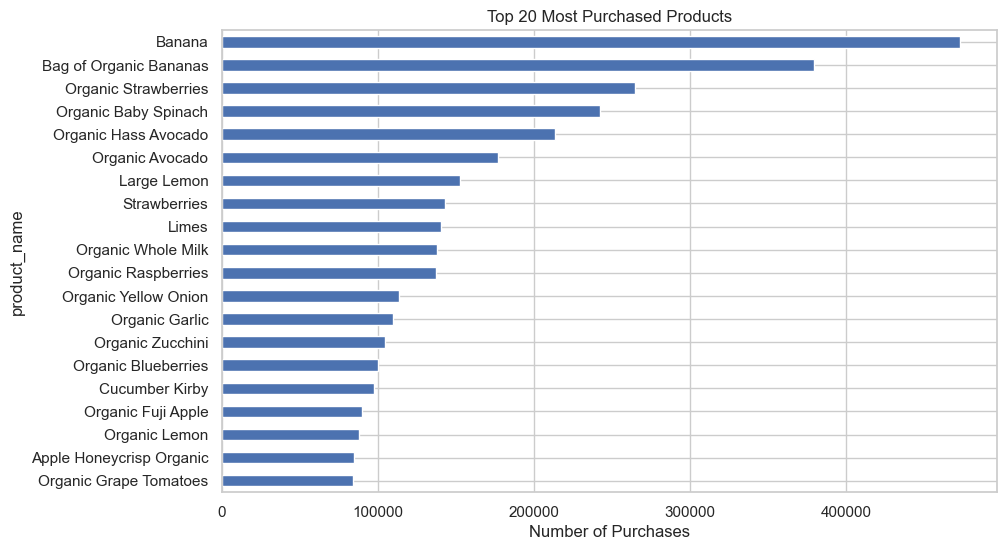

In [ ]:
# Merge product info
order_products = order_products_prior.merge(products, on='product_id', how='left')

# Top 20 most frequently purchased products
top_products = order_products['product_name'].value_counts().head(20)

plt.figure(figsize=(10,6))
top_products.sort_values().plot(kind='barh')
plt.title("Top 20 Most Purchased Products")
plt.xlabel("Number of Purchases")
plt.show()

# Most reordered products
reorder_ratio = order_products.groupby('product_name')['reordered'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
reorder_ratio.sort_values().plot(kind='barh')
plt.title("Top 20 Most Reordered Products")
plt.xlabel("Reorder Ratio")
plt.show()

## 3. Order Timing Analysis

Analyzing when users shop helps us identify behavioral patterns and optimal engagement times for promotions or notifications.


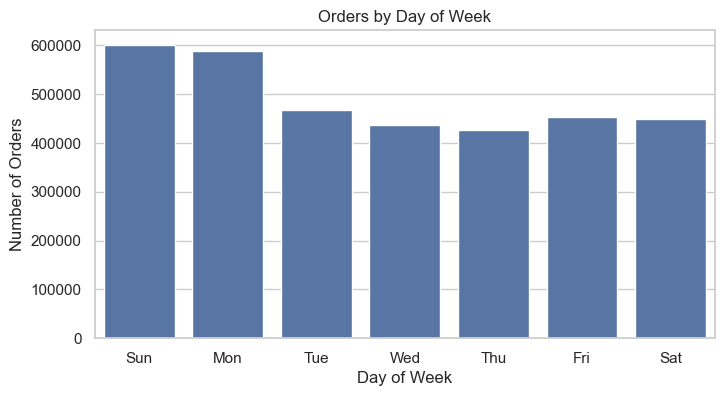

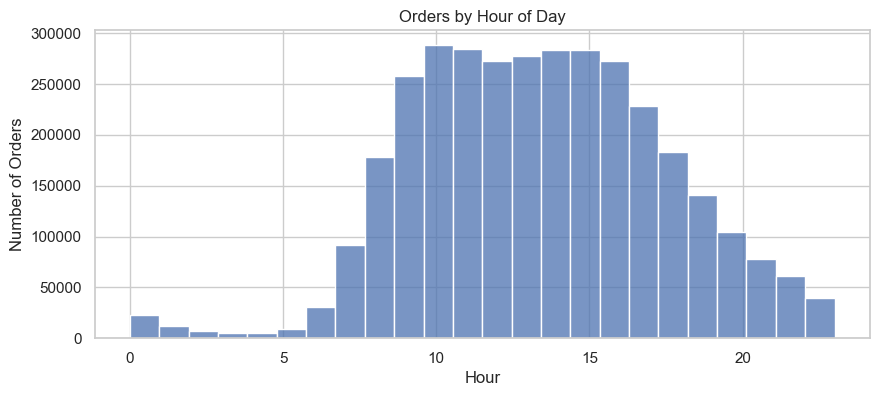

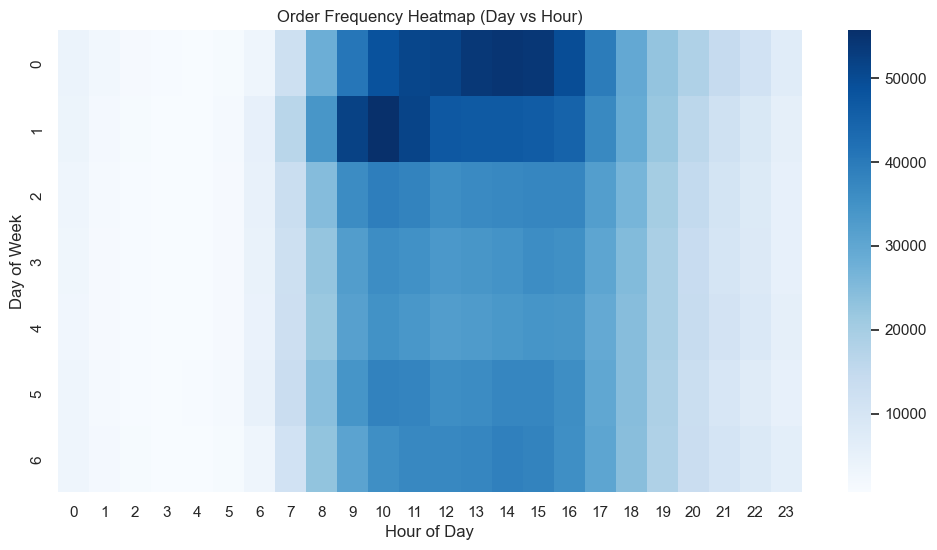

In [ ]:
# Orders by day of week
dow_counts = orders['order_dow'].value_counts().sort_index()
dow_labels = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

plt.figure(figsize=(8,4))
sns.barplot(x=dow_labels, y=dow_counts)
plt.title("Orders by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.show()

# Orders by hour of day
plt.figure(figsize=(10,4))
sns.histplot(orders['order_hour_of_day'], bins=24)
plt.title("Orders by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.show()

# Heatmap: day of week vs hour of day
heatmap_data = orders.groupby(['order_dow', 'order_hour_of_day']).size().unstack()
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='Blues')
plt.title("Order Frequency Heatmap (Day vs Hour)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()


##  4. Basket Size & Diversity

Here we explore how many items users typically purchase in one order and the overall distribution of basket sizes.


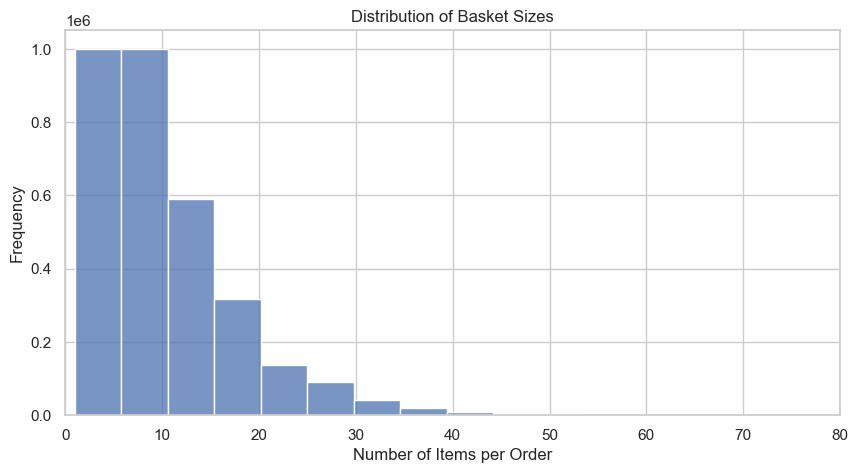

Average items per order: 10.09


In [ ]:
# Items per order
items_per_order = order_products.groupby('order_id')['product_id'].count()

plt.figure(figsize=(10,5))
sns.histplot(items_per_order, bins=30)
plt.title("Distribution of Basket Sizes")
plt.xlabel("Number of Items per Order")
plt.ylabel("Frequency")
plt.xlim(0, 80)  # limit for readability
plt.show()

print("Average items per order:", round(items_per_order.mean(), 2))


## Business Implications

These behavioral patterns indicate that Instacart customers are largely habitual, repeat buyers of fresh staples. Understanding when and how often they shop enables marketing teams to time promotions effectively and suggests that bundling frequently reordered items could improve user experience and basket value.

## Summary of Findings

The exploratory data analysis reveals several consistent behavioral patterns across Instacart users:

- **Order Frequency**: The average user places approximately 15 orders, with a wide variance depending on engagement level. This suggests a mix of both recurring and occasional users in the dataset.
  
- **Time Between Orders**: On average, users wait around 10 days between orders, indicating that many use the platform on a bi-weekly basis for grocery needs.

- **Peak Ordering Times**:
  - **Day of Week**: The highest volume of orders occurs on weekends, particularly Saturday and Sunday.
  - **Hour of Day**: Most orders are placed between 10 AM and 11 AM, indicating that users prefer to shop in the morning hours.

- **Product Trends**: The most commonly purchased items include fresh produce such as bananas and organic strawberries. This implies that users frequently return to purchase staple grocery items.

- **Reorder Behavior**: Approximately 59% of the items in prior orders are reorders. This points to habitual purchasing patterns and provides a basis for recommendation systems or loyalty initiatives. The combination of high reorder rates and peak weekend activity may indicate opportunities for targeted promotions or delivery optimizations aligned with user shopping habits.

These findings form a foundational understanding of overall customer activity and product-level trends on the platform. They help identify recurring behaviors and establish analytical baselines for more advanced segmentation and targeting.

---

## Next Step: SQL-Based User Segmentation

The next notebook, `02_sql_user_segmentation.ipynb`, focuses on segmenting users based on their behavioral traits using SQL techniques. Specifically, we will implement an RFM-style segmentation model using window functions and CTEs to classify users by recency, frequency, and purchase volume. This approach provides a structured method to differentiate user types and inform strategies around customer engagement, retention, and personalization.
